<a href="https://colab.research.google.com/github/Parinda29/AI/blob/main/Movie_Revenue_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [32]:
#uploading dataset
from google.colab import files
uploaded = files.upload()

Saving movies_metadata.csv to movies_metadata (1).csv


In [33]:
# Get the uploaded file
file_name = list(uploaded.keys())[0]

df = pd.read_csv(file_name)
df.head()

/tmp/ipython-input-184308440.py:4: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name)


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [34]:
df = df[['budget', 'popularity', 'runtime', 'vote_average', 'vote_count', 'revenue']]


In [35]:
df = df.replace(0, np.nan)
df = df.dropna()


In [36]:
df['budget'] = df['budget'].astype(float)
df['revenue'] = df['revenue'].astype(float)

In [37]:
X = df[['budget', 'popularity', 'runtime', 'vote_average', 'vote_count']]
y = df['revenue']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [39]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

print("Linear Regression RMSE:", mean_squared_error(y_test, y_pred_lr))
print("Linear Regression R2:", r2_score(y_test, y_pred_lr))

Linear Regression RMSE: 5043639237803758.0
Linear Regression R2: 0.7353300371395173


In [40]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest RMSE:", mean_squared_error(y_test, y_pred_rf))
print("Random Forest R2:", r2_score(y_test, y_pred_rf))


Random Forest RMSE: 4780688042102440.0
Random Forest R2: 0.7491286614897182


In [41]:
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')
df['popularity'] = pd.to_numeric(df['popularity'], errors='coerce')
df['runtime'] = pd.to_numeric(df['runtime'], errors='coerce')
df['vote_average'] = pd.to_numeric(df['vote_average'], errors='coerce')
df['vote_count'] = pd.to_numeric(df['vote_count'], errors='coerce')
df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce')
df = df.dropna()

In [42]:
X_train = X_train.astype(float)
X_test = X_test.astype(float)
y_train = y_train.astype(float)
y_test = y_test.astype(float)

In [43]:
xgb = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)

xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

print("XGBoost RMSE:", mean_squared_error(y_test, y_pred_xgb))
print("XGBoost R2:", r2_score(y_test, y_pred_xgb))

XGBoost RMSE: 5840327270792996.0
XGBoost R2: 0.6935230437839675


In [44]:
new_movie = [[100000000, 50.5, 120, 7.8, 15000]]
# budget, popularity, runtime, vote_average, vote_count

predicted_revenue_lr = lr.predict(new_movie)
print("Predicted Revenue (Linear Regression):", predicted_revenue_lr[0])


Predicted Revenue (Linear Regression): 1210583950.0180802


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [45]:
predicted_revenue_rf = rf.predict(new_movie)
print("Predicted Revenue (Random Forest):", predicted_revenue_rf[0])

Predicted Revenue (Random Forest): 1057767499.25


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [46]:
predicted_revenue_xgb = xgb.predict(new_movie)
print("Predicted Revenue (XGBoost):", predicted_revenue_xgb[0])

Predicted Revenue (XGBoost): 1338378400.0


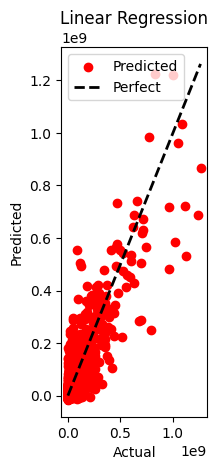

In [47]:
plt.subplot(1, 3, 1)  # 1 row, 3 columns, 1st plot
plt.scatter(y_test, y_pred_lr, color='red', label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect')
plt.title("Linear Regression")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.legend()

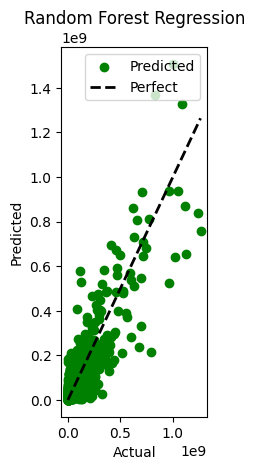

In [48]:
plt.subplot(1, 3, 2)  # 2nd plot
plt.scatter(y_test, y_pred_rf, color='green', label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect')
plt.title("Random Forest Regression")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.legend()

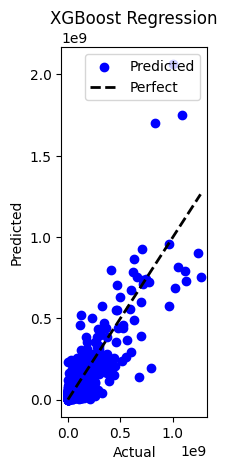

In [49]:
plt.subplot(1, 3, 3)  # 3rd plot
plt.scatter(y_test, y_pred_xgb, color='blue', label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect')
plt.title("XGBoost Regression")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.legend()

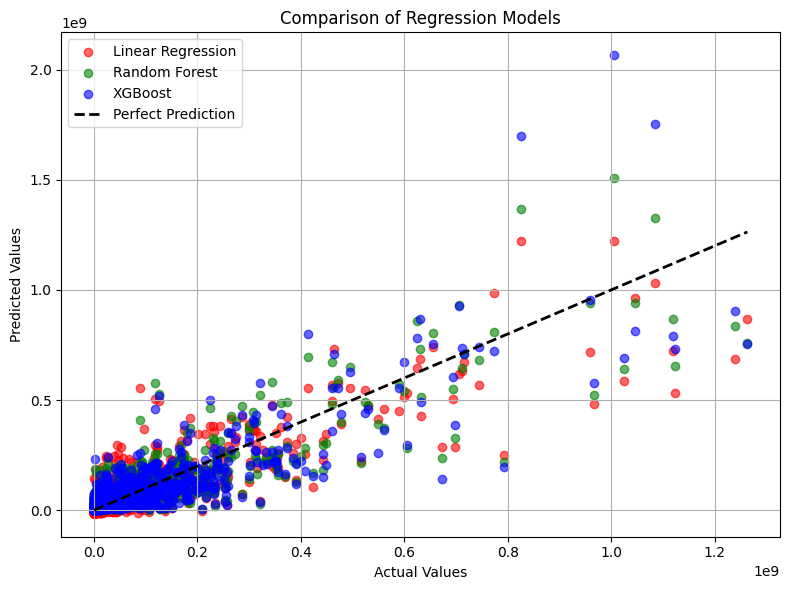

In [50]:
plt.figure(figsize=(8, 6))  # square-ish figure
# Linear Regression
plt.scatter(y_test, y_pred_lr, color='red', label='Linear Regression', alpha=0.6)

# Random Forest
plt.scatter(y_test, y_pred_rf, color='green', label='Random Forest', alpha=0.6)

# XGBoost
plt.scatter(y_test, y_pred_xgb, color='blue', label='XGBoost', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Prediction')
plt.title("Comparison of Regression Models")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()